A wave is a disturbance that travels through space and matter with a transfering energy from one place to another.

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

/tmp/ipykernel_17663/3986292583.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


Model a single wave as a field of a function F(x,t) 
x = the location of a point in space
t = time

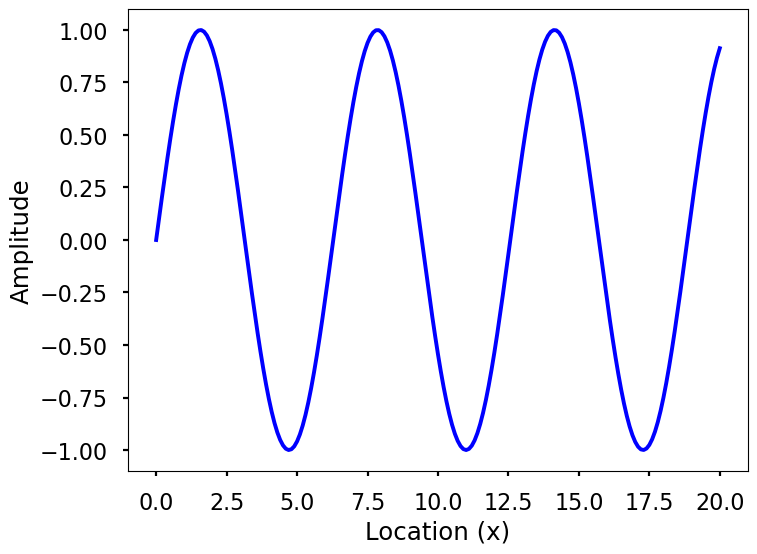

In [19]:
x = np.linspace(0, 20, 201)
y = np.sin(x)

plt.figure(figsize = (8,6))
plt.plot(x, y, 'b')
plt.ylabel("Amplitude")
plt.xlabel("Location (x)")
plt.show()

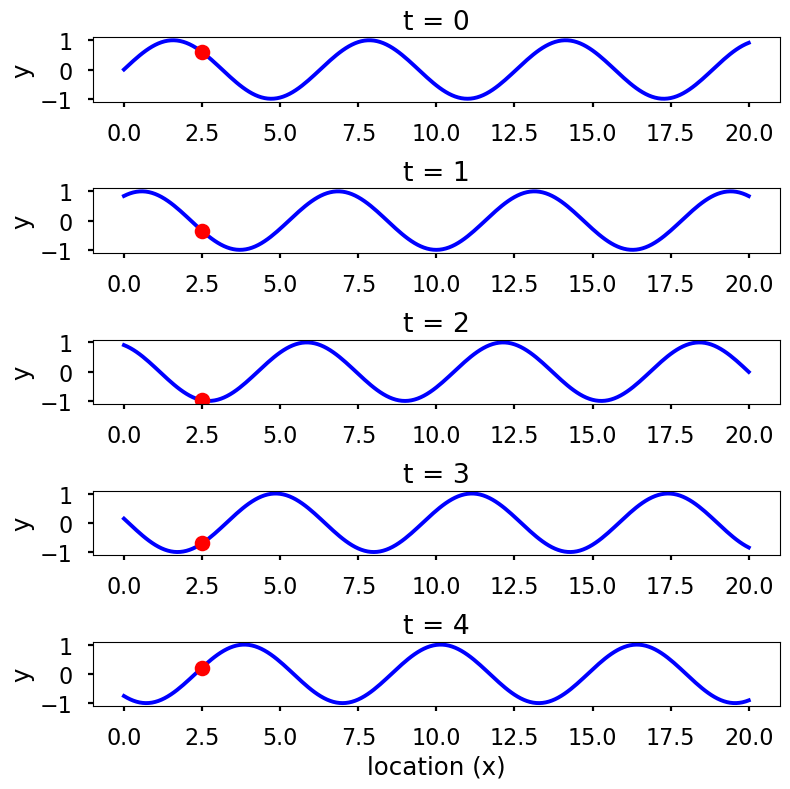

In [20]:
fig = plt.figure(figsize = (8,8))

times = np.arange(5)

n = len(times)

for t in times:
    plt.subplot(n, 1, t+1)
    y= np.sin(x+t)
    plt.plot(x, y, "b")
    plt.plot(x[25], y[25], 'ro')
    plt.ylim(-1.1, 1.1)
    plt.ylabel('y')
    plt.title(f't = {t}')

plt.xlabel('location (x)')
plt.tight_layout()
plt.show()

# Characteristics of a wave
Waves can be a continuous entity both in time and space, 
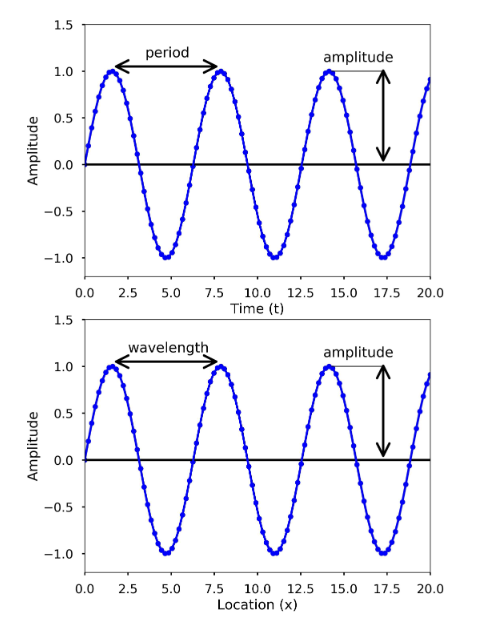

Amplitute = diference between the maximum values to the baseline
Period = time it takes to finish the complete cycle (can be measured from two adjacent peaks)
Wavelength = distance between two successive crests
Frequency = number of waves that pass a fixed place in a given amount of time (cycles per second cycles/seconds = Hertz)

Frequency refers to how often something happens while period refers to the time it takes to complete something
period = 1/frequency 

The blue dots are the discretization points we did both in time and space, therefore, only at these dots, we have sampled the value of the wave. When we record a wave we need to specify how often we sample the wave in time, this is called ##sampling##. And this rate is called sampling rate with the unit Hz (if we sample at 2 Hz, every second we sample two data points)

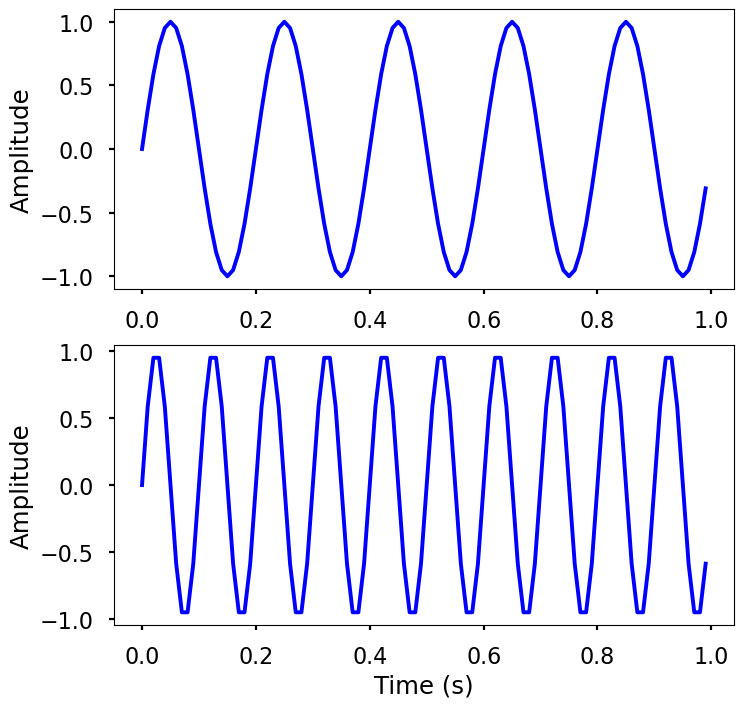

In [21]:
# sampling rate
sr= 100.0
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)   # Nuestra señal va a ir de 0 a 1 con ts samples

#frequency of the signal
freq = 5
y = np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8,8))
plt.subplot(211)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

freq = 10
y= np.sin(2*np.pi*freq*t)

plt.subplot(212)
plt.plot(t,y,'b')
plt.ylabel('Amplitude')

plt.xlabel('Time (s)')
plt.show()

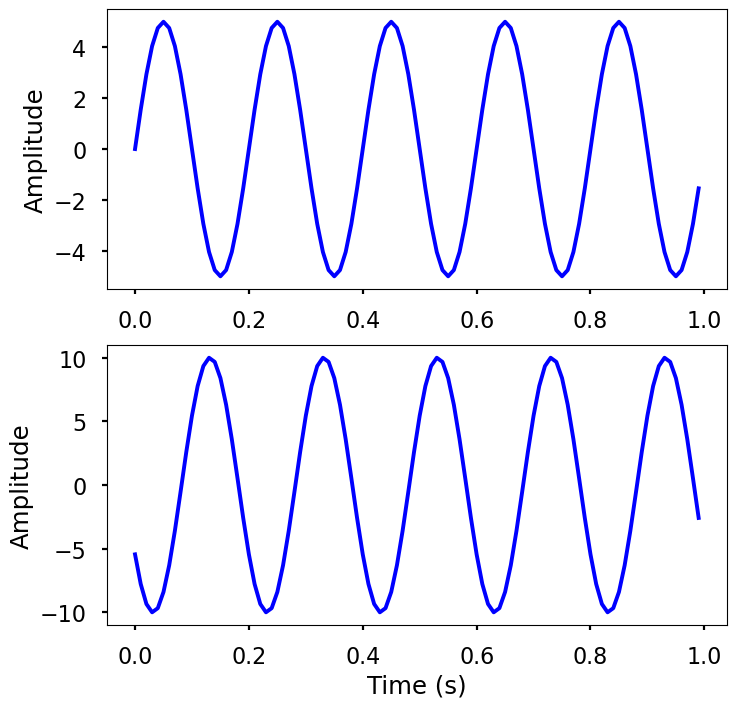

In [22]:
# frequency of the signal
freq = 5
y = 5*np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8,8))
plt.subplot(211)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

y= 10*np.sin(2*np.pi*freq*t+10)

plt.subplot(212)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

plt.xlabel('Time (s)')
plt.show()

## Discrete Fourier Transform (DFT)
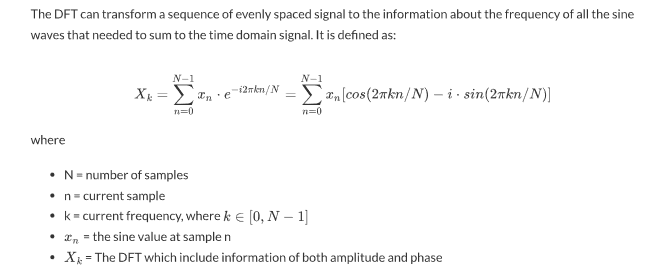

Generate 3 sine waves with frequencies 1Hz, 4Hz and 7Hz, amplitudes 3, 1 and 0.5, and phase all zeros. Add this 3 sine waves together with a sampling rate 100Hz

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

/tmp/ipykernel_17663/3986292583.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


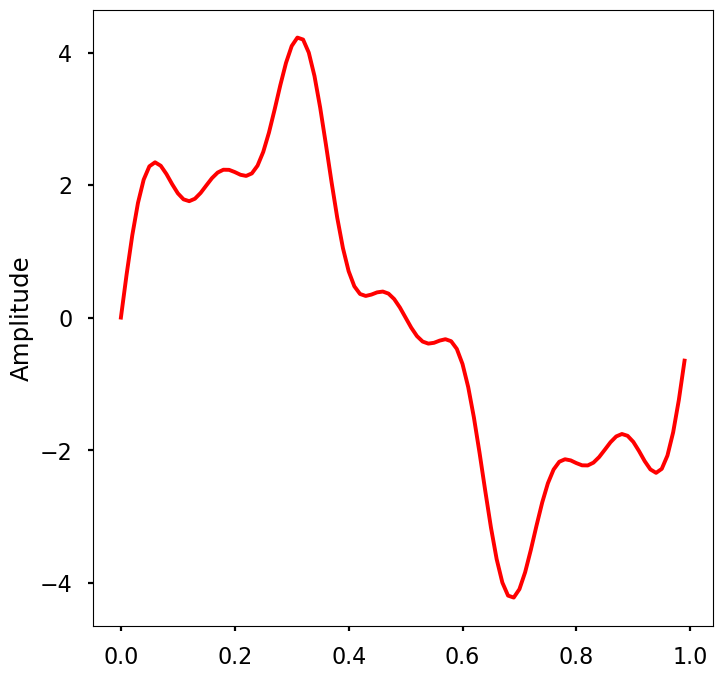

In [24]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t =np.arange(0,1,ts)

freq = 1
#x= ampl*np.sin(phase*freq)
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7
x += 0.5*np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8,8))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [25]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform
    of a 1D real-valued signal x
    """
    
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N,1))
    #e = np.exp(-2j * np.pi * k * n / N)
    e = np.exp((-2j * np.pi * k * n) / N)
    
    X = np.dot(e, x) # Dot product of two arrays
    
    return X

[ 0.00000000e+00  6.49951092e-01  1.24301000e+00  1.73098263e+00
  2.08154121e+00  2.28261600e+00  2.34327722e+00  2.29102039e+00
  2.16602580e+00  2.01350931e+00  1.87561275e+00  1.78433917e+00
  1.75681059e+00  1.79365925e+00  1.88074856e+00  1.99377423e+00
  2.10474409e+00  2.18898123e+00  2.23120727e+00  2.22945607e+00
  2.19600566e+00  2.15511222e+00  2.13796970e+00  2.17587843e+00
  2.29297677e+00  2.50000000e+00  2.79035655e+00  3.13938578e+00
  3.50706391e+00  3.84376807e+00  4.09811869e+00  4.22550953e+00
  4.19578177e+00  3.99863534e+00  3.64577057e+00  3.16934473e+00
  2.61699766e+00  2.04432572e+00  1.50614412e+00  1.04809007e+00
  7.00042246e-01  4.72482828e-01  3.56371693e-01  3.26445884e-01
  3.47223767e-01  3.80502964e-01  3.92885361e-01  3.61888418e-01
  2.79502648e-01  1.52571317e-01  3.06161700e-16 -1.52571317e-01
 -2.79502648e-01 -3.61888418e-01 -3.92885361e-01 -3.80502964e-01
 -3.47223767e-01 -3.26445884e-01 -3.56371693e-01 -4.72482828e-01
 -7.00042246e-01 -1.04809

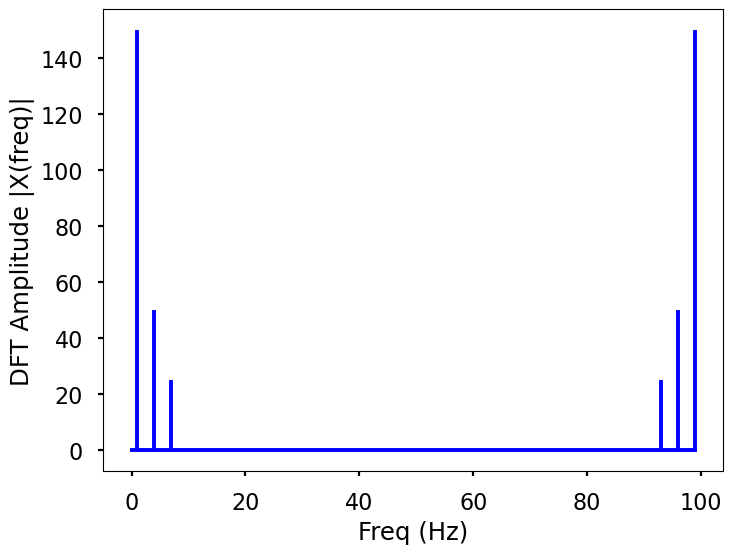

In [26]:
print(x)
X = DFT(x)

#calculate the frequency
N = len(x)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize = (8,6))
plt.stem(freq, abs(X), 'b', \
        markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

In [ ]:
#print(freq)

n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

#normalize the amplitude
X_oneside = X[:n_oneside]/n_oneside

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
        markerfmt=" ", basefmt='-b')
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
        markerfmt=" ", basefmt='-b')
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)  # Aqui se hace el "zoom" (graf 2)
plt.tight_layout()
plt.show()

## Limit of DFT

The main issue with DFT implementation is that it is not efficient if we have a signal with many data points. It may take long time to compute DFT if the signal is large

In [ ]:
# DE TAREA COPIAR EL EJERCICIO (interesante lo del tiempo)
def gen_sig(sr):
    '''
    Function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts) 
    
    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

In [ ]:
# sampling rate 2000
sr = 2000
%timeit DFT(gen_sig(sr))

In [ ]:
%timeit DFT(gen_sig(sr))

## Fast Fourier Transform
Divide and conquer algorithm that recursively breaks the DFT into smaller DFT's to bring down the computation.
Reduces the complexity from O(n2) to O(nlogn) where n is the size of the data


In [12]:
# Note that, the input singal to FFT should have a length of power of 2, it the lenght is not, usually
# we need to fill up zeros to the next power of 2 size.
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the
    input should have a length of 
    power of 2
    """
    N = len(x)
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        
        factor = np.exp((-2j*np.pi*np.arange(N))/N)
        
        X = np.concatenate(
                          [
            X_even+factor[:int(N/2)]*X_odd,
            X_even+factor[int(N/2):]*X_odd
                          ])
        return x



/tmp/ipykernel_17663/1795977017.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


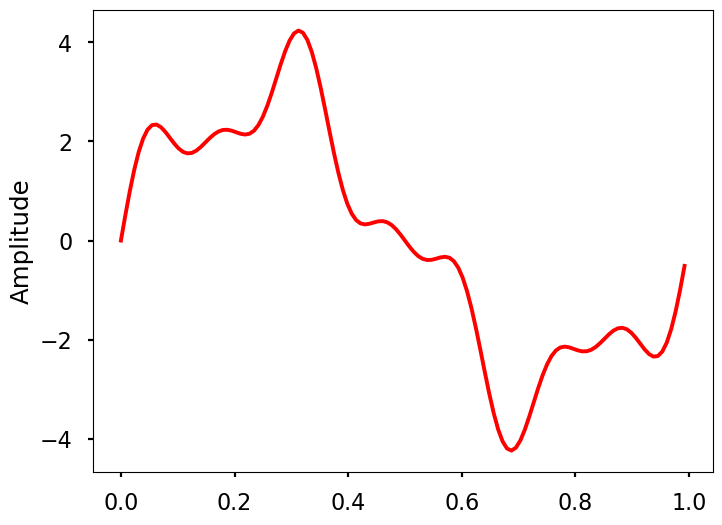

In [13]:
# sample rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7
x += 0.5*np.sin(2*np.pi*freq*t)

plt.figure(figsize=(8,6))
plt.plot(t ,x, 'r')
plt.ylabel("Amplitude")

plt.show()

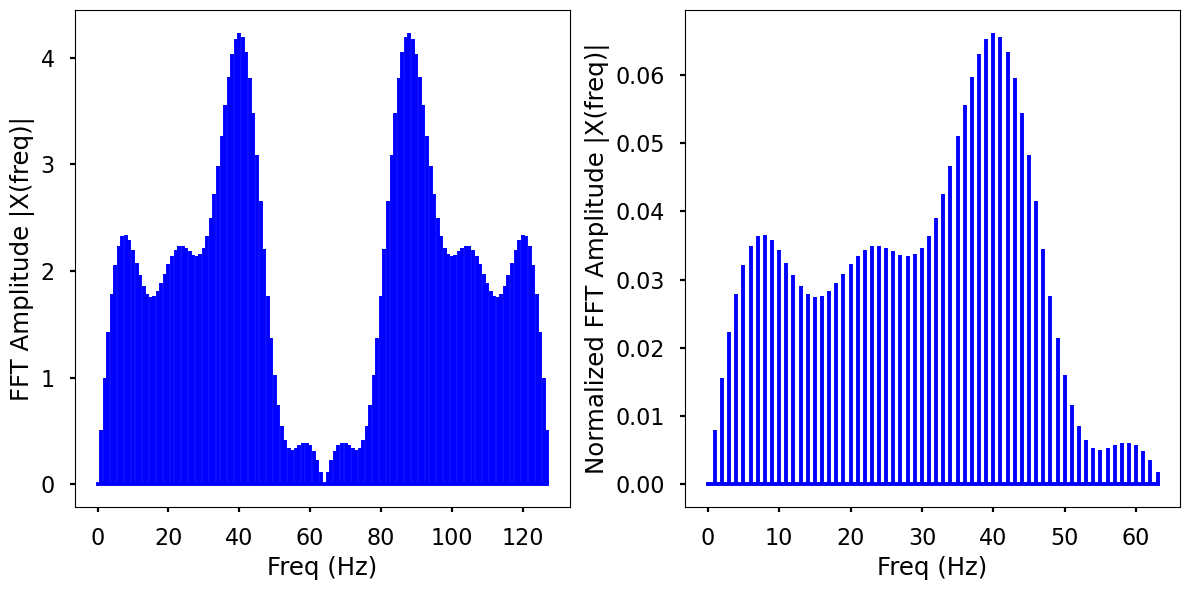

In [17]:
X = FFT(x)

# Calculate the frequency
N = len(x)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
        markerfmt=" ", basefmt="-b")
plt.xlabel("Freq (Hz)")
plt.ylabel("FFT Amplitude |X(freq)|")

# Get the one-sided spectrum
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside = X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
        markerfmt=" ", basefmt="-b")
plt.xlabel("Freq (Hz)")
plt.ylabel("Normalized FFT Amplitude |X(freq)|")
plt.tight_layout()
plt.show()

/tmp/ipykernel_17663/3355945628.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


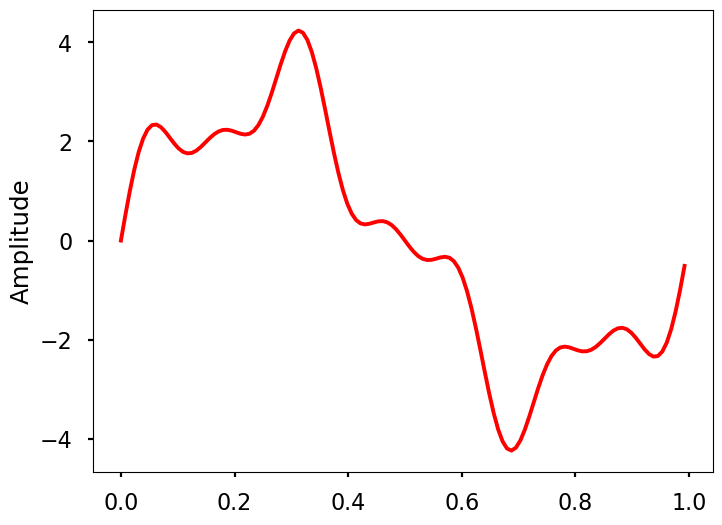

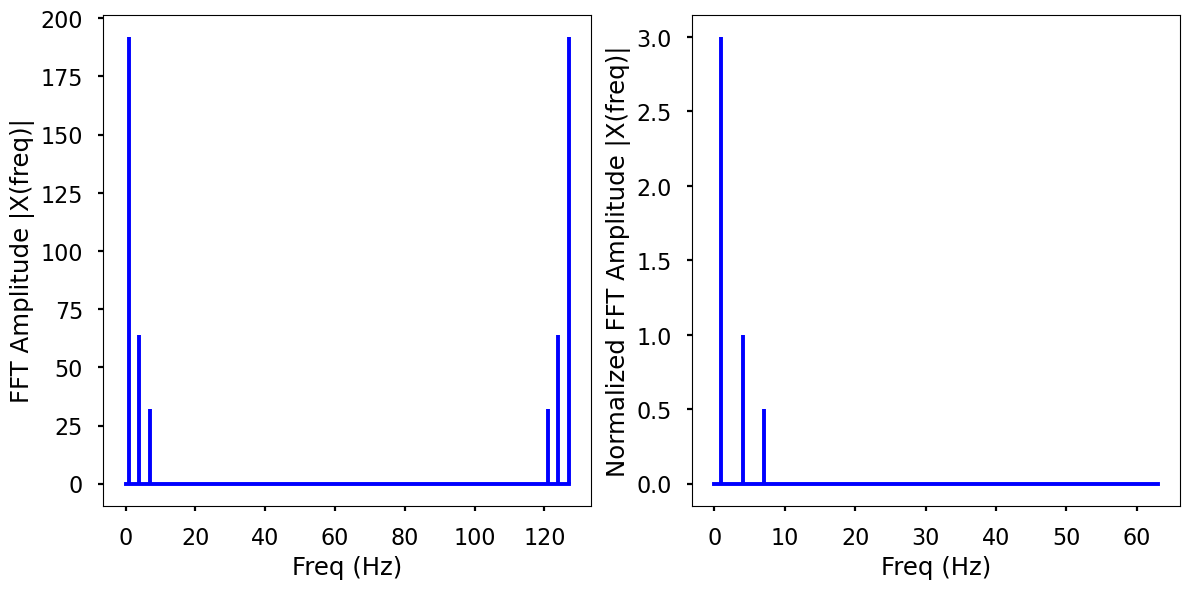

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X
    
    # sampling rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

X=FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

## Ejercicio

In [52]:
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
#www.ncdc.noaa.gov/cdo-web/datasets#GHCND
df0 = pd.read_csv("https://github.com/ipython-books/cookbook-2nd-data"
                  "/blob/master/weather.csv?raw=true", na_values=(-9999), parse_dates=["DATE"])
df = df0[df0["DATE"] >= "19940101"]

df.head()

,STATION,DATE,PRCP,TMAX,TMIN
365,GHCND:FR013055001,1994-01-01,0.0,104.0,72.0
366,GHCND:FR013055001,1994-01-02,4.0,128.0,49.0
367,GHCND:FR013055001,1994-01-03,0.0,160.0,87.0
368,GHCND:FR013055001,1994-01-04,0.0,118.0,83.0
369,GHCND:FR013055001,1994-01-05,34.0,133.0,55.0


In [54]:
df_avg = df.dropna().groupby("DATE").mean()
df_avg.head()

/tmp/ipykernel_17663/931583639.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg = df.dropna().groupby("DATE").mean()


,PRCP,TMAX,TMIN
DATE,,,
1994-01-01,178.666667,127.388889,70.333333
1994-01-02,122.000000,152.421053,81.736842
1994-01-03,277.333333,157.666667,95.555556
1994-01-04,177.105263,142.210526,95.684211
1994-01-05,117.944444,130.222222,75.444444


In [55]:
#date = df_avg.index.to_datetime()
date = pd.to_datetime(df_avg.index)
temp = (df_avg["TMAX"] + df_avg["TMIN"]) / 20
N = len(temp)

Text(0, 0.5, 'Mean temperature')

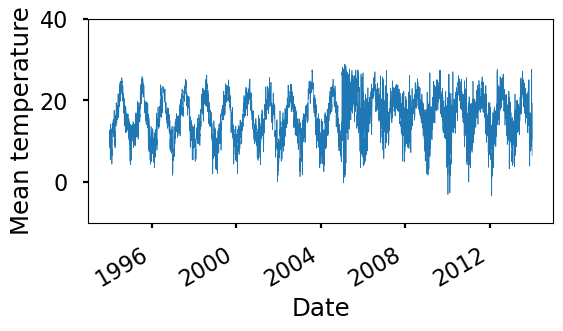

In [56]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
temp.plot(ax=ax, lw=.5)
ax.set_ylim(-10,40)
ax.set_xlabel("Date")
ax.set_ylabel("Mean temperature")

In [64]:
#Compute the FFT of the signal
temp_fft = sp.fftpack.fft(temp.values)   ######### MODIFIED
# Take the square of its absolute value in order to get the POWER SPECTRAL DENSITY (PSD)
temp_psd = np.abs(temp_fft) **2
# To get the frequencies corresponding of the values of the PSD use fftfreq() 
# Takes the length of the PSD vector as input as well as the frenquency unit
# Here we use an annual unit (a frequency of 1 corresponds to 1 year (365 days)) 
# We provide 1/365 because the original unit is in days
fftfreq = sp.fftpack.fftfreq(len(temp_psd), 1./365)

# The fftfreq returns positive and negative requencies, we are only interested in the positives
i = fftfreq > 0

Text(0, 0.5, 'PSD (dB)')

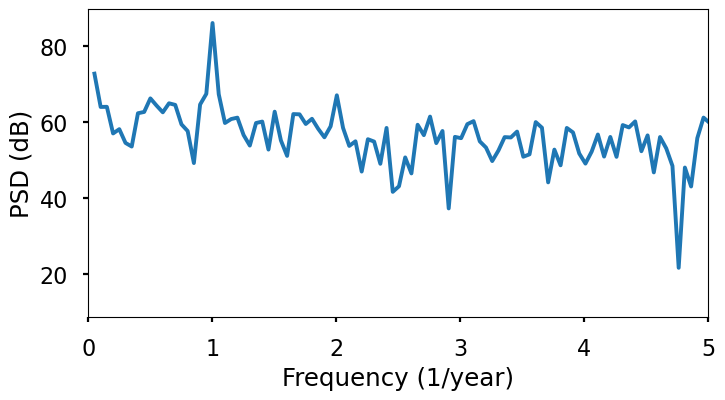

In [65]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
# We choose logarithmic scale for the y axis (decibels)
ax.plot(fftfreq[i], 10* np.log10(temp_psd[i]))
ax.set_xlim(0,5)
ax.set_xlabel("Frequency (1/year)")
ax.set_ylabel("PSD (dB)")

In [61]:
# Because the fundamental frequency of the signal is the yearly variation of the temperature 
# we observe a peak for f=1

# We cut out frequencies higher than the fundamental frequency
temp_fft_bis = temp_fft.copy()
temp_fft_bis[np.abs(fftfreq) > 1.1] = 0

Text(0, 0.5, 'Mean Temperature')

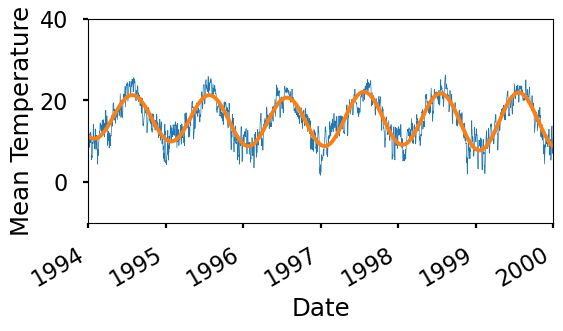

In [62]:
# Next we perform an inverse FFT to convert the modified Fourier transform back to the temporal domain
# This way we recover a signal that mainly contains the fundamental frequency
temp_slow = np.real(sp.fftpack.ifft(temp_fft_bis))

fig, ax = plt.subplots(1,1, figsize=(6,3))
temp.plot(ax=ax, lw=.5)
ax.plot_date(date, temp_slow, "-")
ax.set_xlim(datetime.date(1994,1,1),
           datetime.date(2000,1,1))
ax.set_ylim(-10, 40)
ax.set_xlabel("Date")
ax.set_ylabel("Mean Temperature")